## Importing Libraries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Data Loading

In [2]:
# Load the dataset
df = pd.read_csv('scrape_and_cleaning/data_cleaned.csv')

# Display dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product        287 non-null    object 
 1   feature        287 non-null    object 
 2   brand          287 non-null    object 
 3   price          287 non-null    float64
 4   rating         287 non-null    float64
 5   color          287 non-null    object 
 6   ear_placement  287 non-null    object 
 7   form_factor    287 non-null    object 
 8   impedance      287 non-null    object 
 9   image_url      287 non-null    object 
 10  reviews        287 non-null    object 
dtypes: float64(2), object(9)
memory usage: 24.8+ KB


In [3]:
# Display first five rows of the dataset
df.head()

,product,feature,brand,price,rating,color,ear_placement,form_factor,impedance,image_url,reviews
0,Baseus Eli Sport 2 Open-Ear Headphones Wireles...,"Secure Earhook Sport Design,Ultra-Comfort,4-Mi...",Baseus,19.99,4.0,White,Open Ear,Open Ear earbuds /Over the ear earbuds,16 Ohms,https://m.media-amazon.com/images/I/41iRmtTvb9...,"[{'review': 'I\'ve got to be honest, I\'m blow..."
1,Baseus Inspire XP1 Adaptive Noise Cancelling E...,"Sound by Bose, Dolby Audio, Premium Real-Time ...",Baseus,109.99,4.6,Cosmic Black,In Ear,In Ear,Not Specified,https://m.media-amazon.com/images/I/51L6GgSj6p...,"[{'review': ""Pretty good for the price. They s..."
2,Baseus Eli Sport 2 Open-Ear Headphones Wireles...,"Secure Earhook Sport Design,Ultra-Comfort,4-Mi...",Baseus,19.99,4.0,Green,Open Ear,Open Ear earbuds /Over the ear earbuds,16 Ohms,https://m.media-amazon.com/images/I/51MZtudDew...,"[{'review': 'I\'ve got to be honest, I\'m blow..."
3,Baseus Bass BP1 Pro Noise Cancelling Wireless ...,"Real-Time Adaptive Noise Cancelling, Adaptive ...",Baseus,23.99,4.3,Space Black,In Ear,In Ear,Not Specified,https://m.media-amazon.com/images/I/51qpokZ6oO...,[{'review': 'Have you ever felt the gut rumbli...
4,Baseus Bass BP1 NC Hybrid Active Noise Cancell...,"12mm Super-Bass Driver, 41H Playtime, Bluetoot...",Baseus,21.99,4.6,Black,In Ear,In Ear,16 Ohms,https://m.media-amazon.com/images/I/51RyPpxGPH...,"[{'review': 'The sound quality is clean, and t..."


In [4]:
# Show value counts for 'form_factor' column
df['form_factor'].value_counts()

form_factor
In Ear                                    228
True Wireless                              26
Over Ear                                   11
Open Ear                                   11
On Ear                                      3
Open Ear earbuds /Over the ear earbuds      3
open ear                                    3
Open ear                                    2
Name: count, dtype: int64

In [5]:
# Standardize 'form_factor' entries
df['form_factor'] = df['form_factor'].replace({
    'Open ear': 'Open Ear',
    'open ear': 'Open Ear',
    'Open Ear earbuds /Over the ear earbuds': 'Open/Over Ear Earbuds'
})

In [6]:
# Show value counts for 'form_factor' column after standardization
df['form_factor'].value_counts()

form_factor
In Ear                   228
True Wireless             26
Open Ear                  16
Over Ear                  11
Open/Over Ear Earbuds      3
On Ear                     3
Name: count, dtype: int64

## Exploratory Data Analysis

### 1.

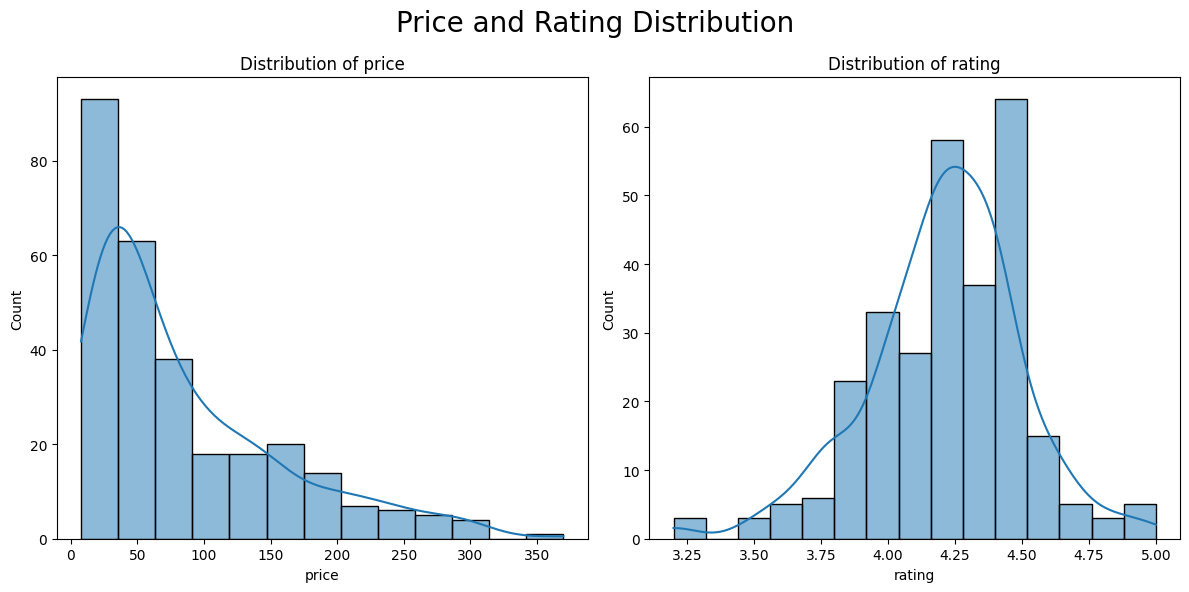

In [19]:
# Visualisasi distribusi tiap kolom numeric
num_col = ('price', 'rating')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Price and Rating Distribution', fontsize=20)
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(df[col], 
                kde=True, 
                ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### 2.

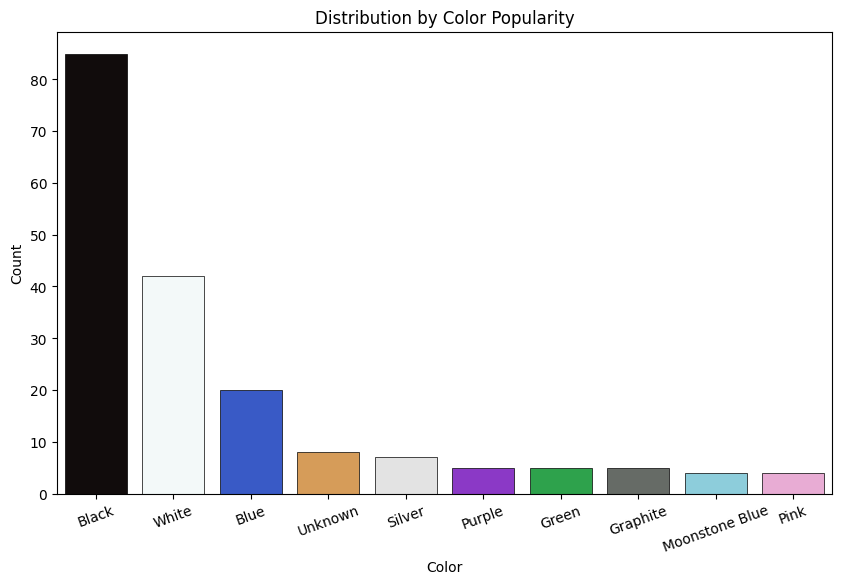

In [ ]:
# Distribution by Top 10 Color

top_colors = df['color'].value_counts().nlargest(10)
top_colors_names = top_colors.index

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['color'].isin(top_colors_names)],
              x='color',
              dodge=False,
              order=top_colors_names,
              edgecolor='black',
              linewidth=0.5,
              palette=['#120B0B', '#F2FAFA', '#224EDD', '#EB9D44', '#E3E3E3', 
                        '#8F21DE', '#1BB542', '#656C65', '#80D5E8', '#F2A2D7'])
plt.title('Distribution by Color Popularity')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

### 3.

In [10]:
average_price = (df.groupby('brand')['price'].mean().reset_index().sort_values(by='price', ascending=False).head(10))
average_price.rename(columns={'price': 'average_price'}, inplace=True)

average_price

,brand,average_price
1,Bose,195.747353
16,Sennheiser,179.031538
15,Samsung,97.327619
5,Golrex,89.980000
6,Huawei,88.995000
13,Realme,74.034545
7,Jbl,67.036667
18,Skullcandy,63.878889
11,Monster,59.990000
10,Lenovo,55.990000


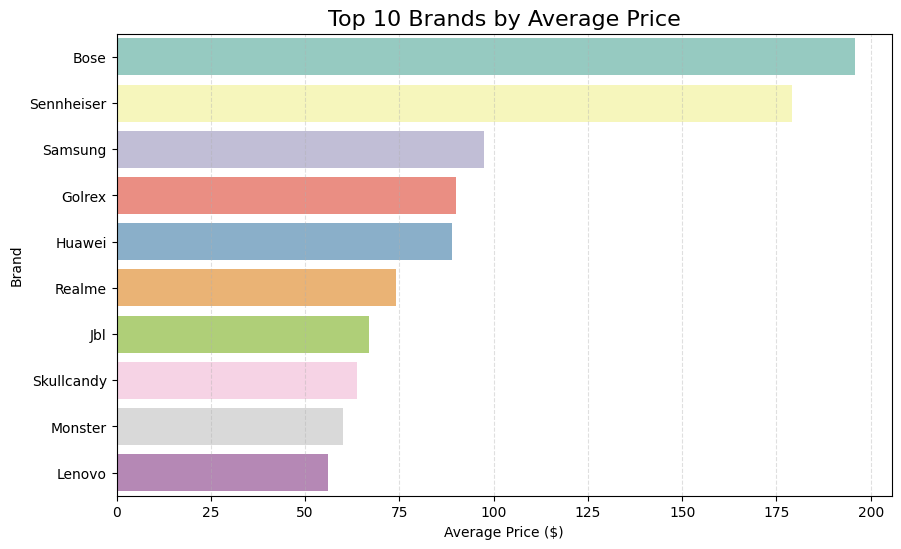

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price,
            x='average_price', 
            y='brand', 
            hue='brand', 
            palette='Set3')
plt.title('Top 10 Brands by Average Price', 
            fontsize=16)
plt.xlabel('Average Price ($)')
plt.ylabel('Brand')
plt.grid(axis='x', 
        linestyle='--', 
        alpha=0.4)
plt.show()

### 4.

In [20]:
average_rating = (df.groupby('brand')['rating'].mean().reset_index().sort_values(by='rating', ascending=False).head(10))
average_rating.rename(columns={'rating': 'average_rating'}, inplace=True)

average_rating

,brand,average_rating
5,Golrex,5.000000
17,Sgnics,5.000000
4,Fhumsh,4.900000
9,Leemc,4.850000
23,Vifigen,4.600000
19,Sony,4.400000
8,Jlab,4.400000
3,Cmf By Nothing,4.400000
24,Xiaomi,4.350000
13,Realme,4.318182


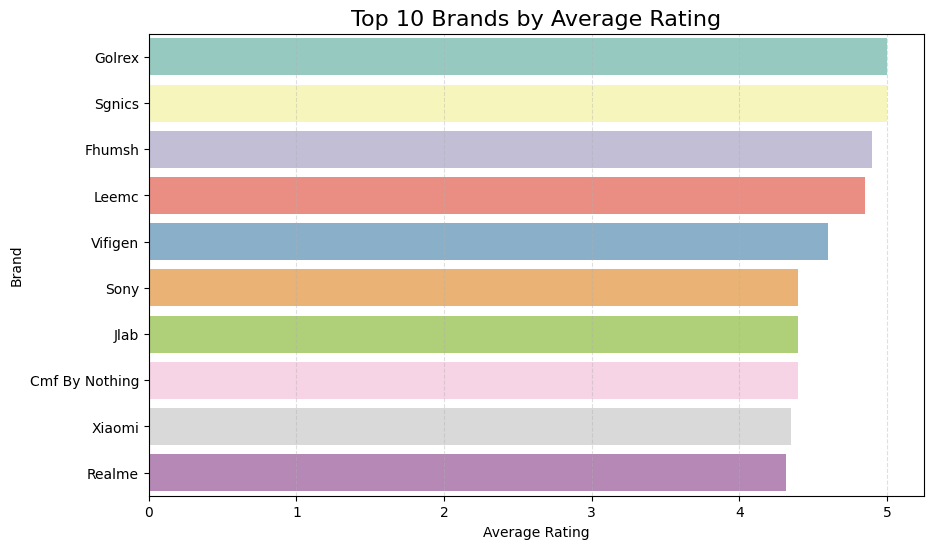

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=average_rating,
            x='average_rating', 
            y='brand', 
            hue='brand', 
            palette='Set3')
plt.title('Top 10 Brands by Average Rating', 
            fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.grid(axis='x', 
        linestyle='--', 
        alpha=0.4)
plt.show()

### 5.

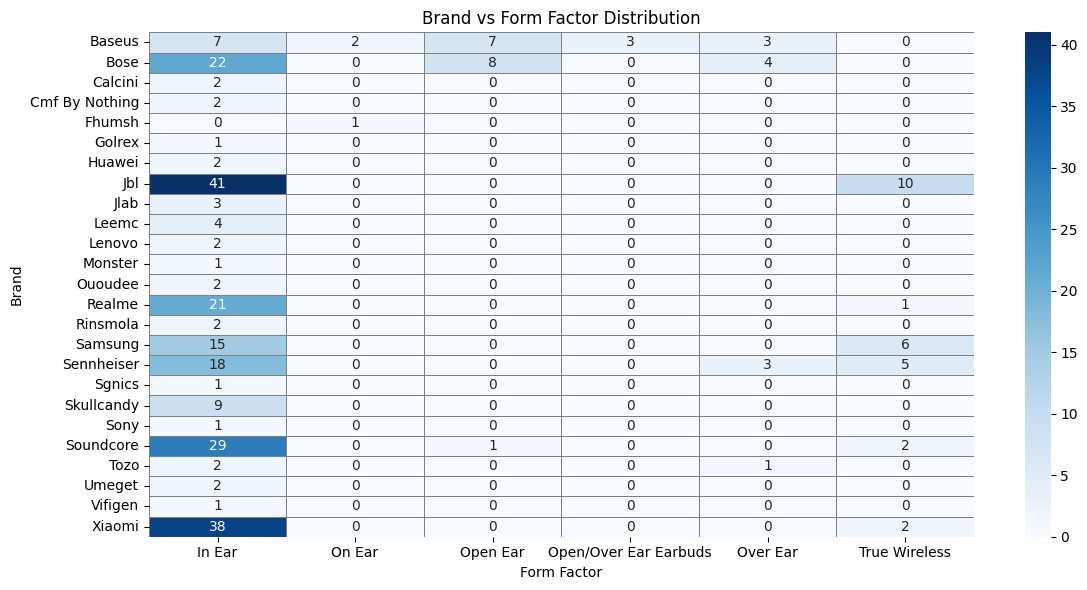

In [101]:
# Create pivot table
pivot_form = pd.pivot_table(df, 
                            index='brand',
                            columns='form_factor',
                            aggfunc='size',
                            fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_form,
            annot=True,
            linewidth=0.5,
            linecolor='gray',
            fmt='d',
            cmap='Blues')
plt.title('Brand vs Form Factor Distribution')
plt.xlabel('Form Factor')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

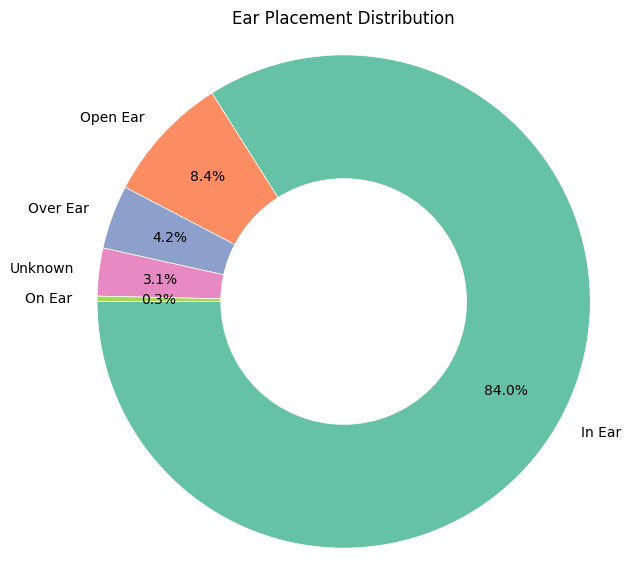

In [61]:
plt.figure(figsize=(7, 7))
plt.pie(
    df['ear_placement'].value_counts().values,
    labels=df['ear_placement'].value_counts().index,
    autopct='%1.1f%%',
    startangle=180,
    labeldistance=1.1,
    pctdistance=0.75,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
    colors=sns.color_palette('Set2')
)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Ear Placement Distribution')
plt.axis('equal')
plt.show()

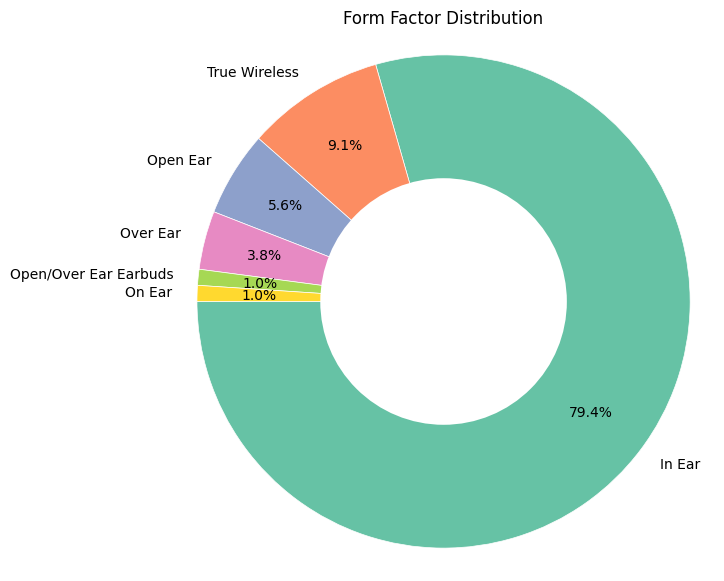

In [62]:
plt.figure(figsize=(7, 7))
plt.pie(
    df['form_factor'].value_counts().values,
    labels=df['form_factor'].value_counts().index,
    autopct='%1.1f%%',
    startangle=180,
    labeldistance=1.1,
    pctdistance=0.75,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
    colors=sns.color_palette('Set2')
)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Form Factor Distribution')
plt.axis('equal')
plt.show()